# Simulando pesquisas eleitorais com Python

### Esse código é o complemento do meu post sobre pesquisas eleitorais, ele pode ser lido [aqui](https://www.itsjohnsnotes.com/single-post/2018/10/27/Pesquisas-Eleitorais-Só-Precisam-de-2000-Pessoas-Pra-Acertar-Uma-Prova-Com-Programação)

In [6]:
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Primeiro, definimos o tamanho do eleitorado e o número de votos para os quais vamos simular e definimos a função 'pesquisa'

In [31]:
def pesquisa(eleitorado, votacao, amostra):
    resultado = 0
    for i in range(amostra):
        chave = random.randint(0,eleitorado)
        if chave < votacao:
            resultado += 1
        else:
            resultado += 0
    return (resultado/amostra)

## Agora vamos simular uma pesquisa:

In [34]:
eleitorado = 150000000
votacao = 60000000
amostra = 2000
resultado_pesquisa = pesquisa(eleitorado, votacao, amostra) * eleitorado
erro = abs(((resultado_pesquisa)/votacao - 1) * 100)

print("resultado: {}, erro:{}".format(resultado_pesquisa, erro))

resultado: 58725000.0, erro:2.124999999999999


## Depois, definimos o número de simulações de pesquisa que queremos executar e definimos a função 'Simulacao'

### Essa função retorna o resultado médio e o erro médio depois de realizadas 'simulacoes' pesquisas.

In [35]:
def simulacao_formula_funcao(simulacoes, amostra):
    soma_resultado = 0
    soma_erro = 0
    for i in range(simulacoes):
        resultado = pesquisa(eleitorado, votacao, amostra)
        soma_resultado += resultado
        soma_erro += abs(((resultado)/votacao - 1) * 100)
    resultado_medio = soma_resultado/ simulacoes
    return soma_resultado

In [41]:
def simulacao_erro(simulacoes, amostra):
    soma_resultado = 0
    soma_erro = 0
    for i in range(simulacoes):
        resultado = pesquisa(eleitorado, votacao, amostra) * eleitorado
        soma_resultado += resultado
        soma_erro += abs(((resultado)/votacao - 1) * 100)
    erro_medio = soma_erro/ simulacoes
    return erro_medio

## Agora vamos visualizar a diferença do erro médio para tamanhos diferentes de amostra

### O código abaixo faz 150 simulações em diferentes tamanhos de amostra. A amostra varia de 10 em 10, partindo de 10 a 1500. No total, são feitas 150.000 'pesquisas'.

In [42]:
valores_amostra = []
resultado_medio = []
erro_medio = []
teste = []
dab = []
for i in range(1,451):
    teste.append(0)
    erro_medio.append(0)
    valores_amostra.append(i*10)
for i in range(0,450):
    simulacao_formula = simulacao_formula_funcao(100, valores_amostra[i])
    formula[i] = (simulacao_formula * (1-simulacao_formula))/valores_amostra[i]
    erro_medio[i] = simulacao_erro(100, valores_amostra[i])
print("Finalizado")

Finalizado


In [43]:
dab = []
for i in range(1,451):
    dab.append(0)
for i in range(0,450):
    erro_formula[i] = math.sqrt(abs(formula[i]))


In [44]:
erro_medio

[34.75,
 19.75,
 17.333333333333336,
 14.5,
 13.6,
 13.08333333333334,
 11.64285714285714,
 11.65625,
 11.222222222222221,
 9.875,
 7.954545454545443,
 9.875000000000002,
 8.826923076923077,
 7.910714285714288,
 7.100000000000006,
 7.984375,
 8.044117647058824,
 6.791666666666665,
 7.657894736842106,
 8.162500000000001,
 6.547619047619048,
 6.306818181818178,
 6.249999999999997,
 6.552083333333334,
 6.050000000000001,
 5.9134615384615365,
 6.648148148148144,
 5.580357142857143,
 6.517241379310342,
 5.61666666666667,
 5.677419354838714,
 5.421875,
 5.393939393939393,
 5.294117647058823,
 5.442857142857145,
 5.659722222222223,
 5.466216216216222,
 5.026315789473685,
 5.096153846153842,
 4.80625,
 4.195121951219512,
 4.488095238095238,
 4.191860465116278,
 4.073863636363631,
 4.066666666666668,
 4.141304347826088,
 3.957446808510637,
 3.8229166666666674,
 4.316326530612243,
 4.665,
 4.264705882352942,
 4.27403846153846,
 4.202830188679245,
 4.541666666666663,
 4.136363636363637,
 4.053571

## Vizualizando a variação do erro quando se varia as amostras.

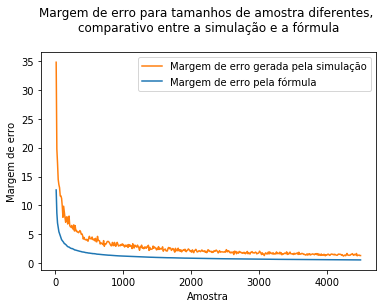

In [63]:
plt.xlabel("Amostra")
plt.ylabel("Margem de erro")
plt.title("Margem de erro para tamanhos de amostra diferentes, \ncomparativo entre a simulação e a fórmula\n")

line1, = plt.plot(valores_amostra, erro_formula, label="Margem de erro pela fórmula")
line2, = plt.plot(valores_amostra, erro_medio, label="Margem de erro gerada pela simulação")
plt.legend(handles=[line2, line1])
plt.show()

## Podemos concluir, então, que o erro não excede 4.06 pontos percentuais para amostras menores que 4500.

# Código elaborado por João Pedro Oliveira. 2018